Datatrained
Evaluation Project - 4
Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [7]:
global_powerplant=pd.read_csv("global_power.csv")

In [8]:
df=pd.DataFrame(global_powerplant)
df.head(5)



,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [9]:
df.shape


(907, 27)

In this dataset we can see that there are 907 rows and 27 columns



In [10]:
#check the different column labels 
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
#check the data types of all the column
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From the above information 

we can observe that there are 15 columns with dtype float and 12 columns with dtype object
Also there are some missing values almost in all the columns, we can study about it in detailed in upcoming steps


In [13]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

From the above 
we can observe that there are missing values

in 19 columns and the columns other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh which has all the 907 values missing. We can drop off these columns in further steps.



In [14]:
# Checking on each variable for their characteristics
df['country'].unique()


array(['IND'], dtype=object)

In [15]:
df['country'].value_counts()


IND    907
Name: country, dtype: int64

In [16]:
df['country_long'].value_counts()


India    907
Name: country_long, dtype: int64

In the column country

we can see that there is only 1 unique value (IND), which tells us that the data set speaks about only the power plants in India


Same as in first column,
there is only 1 unique value (India), 
the column country and country_long has no much difference, both tells us about which country the power plant belongs to, We can now drop off any one column as both the columns gives us similar information.



In [17]:
# dropping the column 'country'
df.drop(['country'],axis=1,inplace=True)


In [18]:
df.shape


(907, 26)

<AxesSubplot:xlabel='country_long', ylabel='Count'>

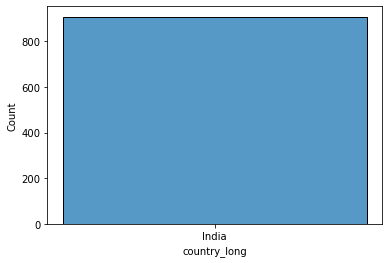

In [19]:
sns.histplot(df['country_long'])


In [20]:
df['name'].value_counts()


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

we can observe that there are 907 unique values, i.e, each row tells us details about an unique power plant



In [21]:
df['gppd_idnr'].value_counts()


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

 in the gppd_idnr column we can see that there are 907 unique values, this column is about 10 or 12 character identifier for the power plant



In [22]:
df['capacity_mw'].value_counts()


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

here the column capacity_mw tells us about the electrical generating capacity in megawatts in each power plant, there are 361 unique values in this. capacity_mw is the output variable for our model.



<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

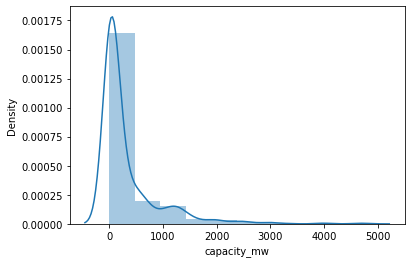

In [23]:
sns.distplot(df['capacity_mw'],bins=10)


In this 
plot we can observe the distribution of data in capacity_mw and there is left skewness present in the data



{'whiskers': [<matplotlib.lines.Line2D at 0x211ce272700>,
 'caps': [<matplotlib.lines.Line2D at 0x211ce272ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x211ce2672b0>],
 'medians': [<matplotlib.lines.Line2D at 0x211ce283280>],
 'fliers': [<matplotlib.lines.Line2D at 0x211ce283550>],
 'means': []}

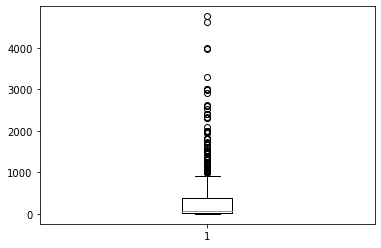

In [24]:
plt.boxplot(df['capacity_mw'])


From the above plot we observe that there are outliers present
in the capacity_mw column

As count of missing values in the columns

other_fuel2 = 906
other_fule3 = 907
wepp_id = 907
generation_gwh_2013 = 907
generation_gwh_2019 = 907
estimated_generation_gwh = 907

We can drop off these columns



In [25]:
#dropping these columns
df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)
df.shape


(907, 20)

In [26]:
df.columns


Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [27]:
#printing the latitude and longitude 
print(df['latitude'].value_counts())
print(df['longitude'].value_counts())


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64
71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


The columns latitude and longitude gives us details about geolocation in decimal degrees of the power plants, From the above data we can observe that there 836 unique values in latitude and 827 unique values in longitude



Text(0.5, 1.0, 'Histogram of longitude')

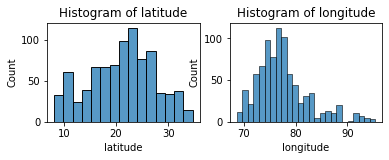

In [30]:
# check the data distribution of latitude and longitude
plt.subplot(2,2,1)
sns.histplot(df['latitude'])
plt.title('Histogram of latitude')
plt.subplot(2,2,2)
sns.histplot(df['longitude'])
plt.title('Histogram of longitude')


In [31]:
#check the types of fuel
df['primary_fuel'].value_counts()


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

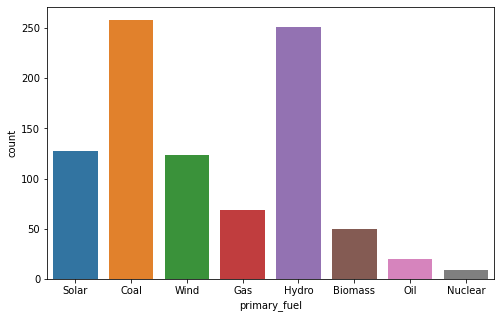

In [32]:
plt.figure(figsize = (8,5))
sns.countplot(df['primary_fuel'])


The column Primary_fuel gives us details about the primary fuel that is being used in the power plant for the power generation,

from the above plot we can observe that Hydro and coal are the majorly used source for power generation and nuclear is the least used source.

This is the variable that we have to use for second prediction.



Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

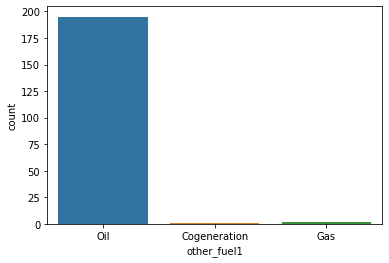

In [33]:
print(df['other_fuel1'].value_counts())
sns.countplot(df['other_fuel1'])


The column other fuel1 tells the other sources used in power generation, oil is majorly used source as per the data above.



In [34]:
df['commissioning_year'].value_counts()


2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

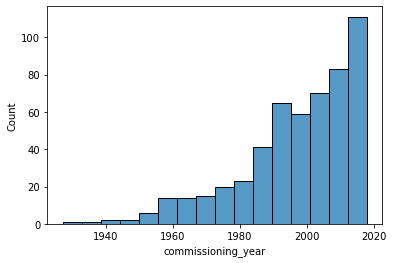

In [35]:
sns.histplot(df['commissioning_year'])


This column gives us details about year of plant operation, weighted by unit-capacity when data is available, and we can observe that it has right skewness, theres are 73 unique values in the column



In [36]:
df['owner'].value_counts()


Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

From the above table we can observe that there are 280 unique counts out of 907 values



In [37]:
df['source'].value_counts()


Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

This column tells about entity reporting the data; could be an organization, report, or document, generally in Romanized form, it has 191 usning values



In [38]:
df['url'].value_counts()


http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

As the column url gives us the url links it has nothing to do with output variables 'primary_fuel' and 'capacity_mw', hence the column can be dropped



In [39]:
df.drop(['url'],axis=1,inplace=True)
df.shape


(907, 19)

In [40]:
df['geolocation_source'].value_counts()


WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

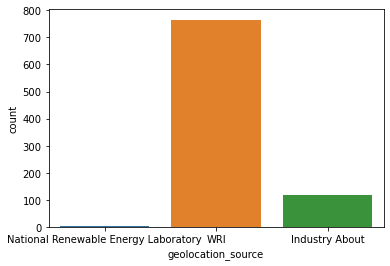

In [41]:
sns.countplot(df['geolocation_source'])


This column is about attribution for geolocation information and has 3 unique values, highest attribution is given by WRI and least is of National Renewable Energy Laboratory and the same is shown in the above plot



In [42]:
df['year_of_capacity_data'].value_counts()


2019.0    519
Name: year_of_capacity_data, dtype: int64

In [43]:
df['generation_gwh_2014'].value_counts()


0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

It has only one value '2019' and with the count 519 out of 907 and rest are missing values in the column



Text(0.5, 1.0, 'generation_gwh_2014')

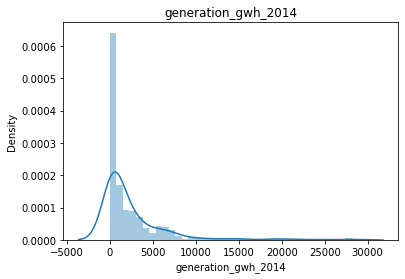

In [44]:
sns.distplot(df['generation_gwh_2014'])
plt.title('generation_gwh_2014')


Text(0.5, 1.0, 'generation_gwh_2015')

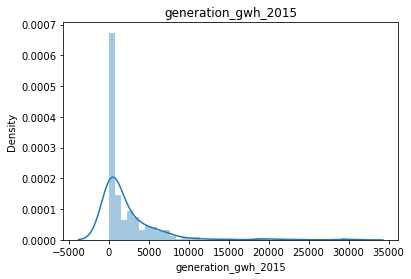

In [45]:
sns.distplot(df['generation_gwh_2015'])
plt.title('generation_gwh_2015')



Text(0.5, 1.0, 'generation_gwh_2016')

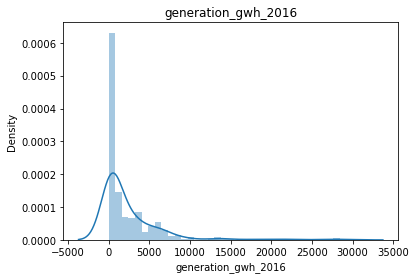

In [46]:
sns.distplot(df['generation_gwh_2016'])
plt.title('generation_gwh_2016')


Text(0.5, 1.0, 'generation_gwh_2017')

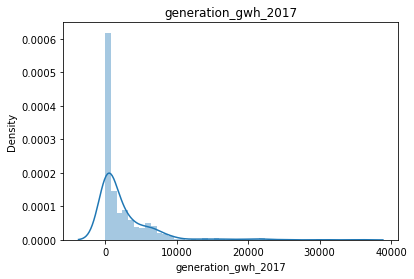

In [47]:
sns.distplot(df['generation_gwh_2017'])
plt.title('generation_gwh_2017')


Text(0.5, 1.0, 'generation_gwh_2018')

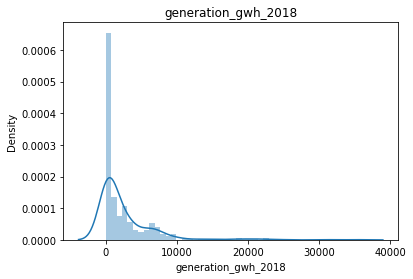

In [48]:
sns.distplot(df['generation_gwh_2018'])
plt.title('generation_gwh_2018')


The above 5 plots gives us details about electricity generation in gigawatt-hours reported for the year 2014, 2015, 2016, 2017, 2018 respectively, We can observe that the all the plot have almost similar distribution and all the variables have left skewness in their data



In [49]:
df['generation_data_source'].value_counts()


Central Electricity Authority    449
Name: generation_data_source, dtype: int64

The column has only one unique value with the count 449 and rest out of 907 are missing, this variable gives us details about attribution for the reported generation information

As the columns 'country_long', 'name' and 'gppd_idnr' had 907 unique value out of 907 instances, name, country and identifiers has nothing to do with fuel used for power generation and amount of power generated, hence these 3 columns can be dropped from our dataset



In [50]:
df.drop(['country_long', 'name', 'gppd_idnr'],axis=1,inplace=True)
df.shape


(907, 16)

In [51]:
df.columns


Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

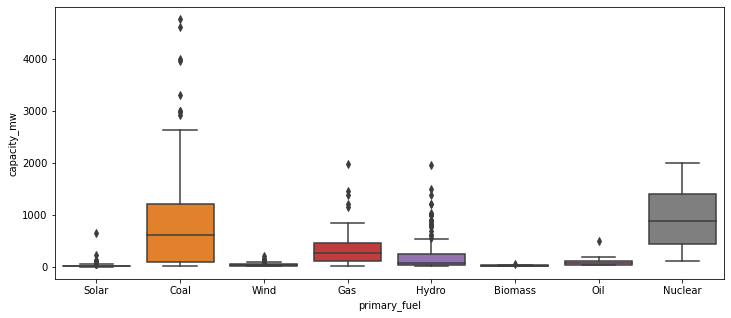

In [52]:
# Bivariate analysis, We can chech for relation of output variables with input variables
plt.figure(figsize = (12,5))
sns.boxplot(y='capacity_mw', x='primary_fuel', data=df)


Above is the plot to understand the relation between capacity_mw and primary_fuel, it tells that the plants which use coal as the primary fuel has the highest power output in mw



<Figure size 864x360 with 0 Axes>

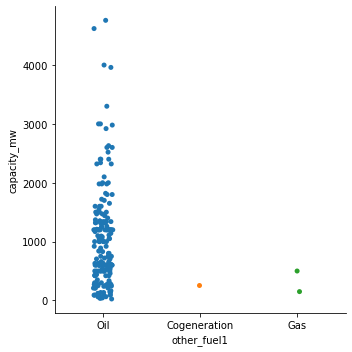

In [53]:
plt.figure(figsize = (12,5))
sns.catplot(y='capacity_mw', x='other_fuel1', data=df)


The plants that uses oil as oil fuel gives the highest power output as per the plot above



<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

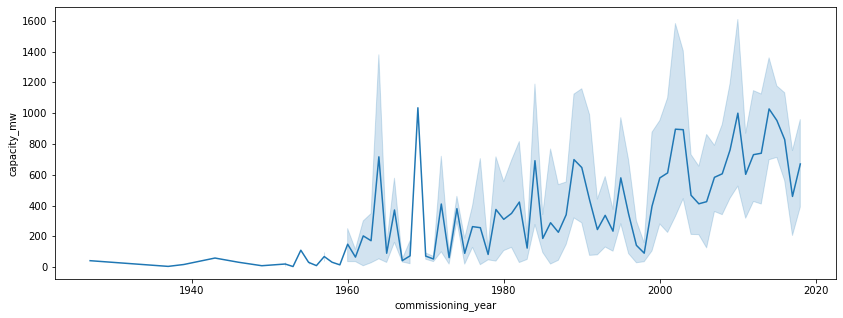

In [54]:
plt.figure(figsize = (14,5))
sns.lineplot(y='capacity_mw', x='commissioning_year', data=df)


The capacity of power generation is less during the years 1940 and arround, gradually it increases in the coming years and we can observe that capacity of power generation by the plants is highest in the years 2012 and above



<Figure size 1008x360 with 0 Axes>

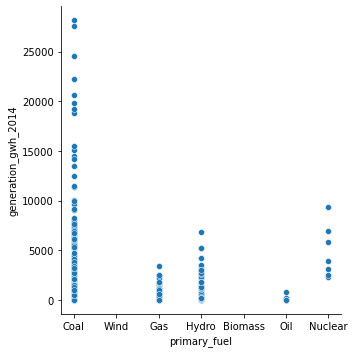

In [55]:
plt.figure(figsize = (14,5))
sns.relplot(x='primary_fuel', y='generation_gwh_2014', data=df)



In the year 2014 the plants that used coal as its source did the highest power generation as per the plot above



<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

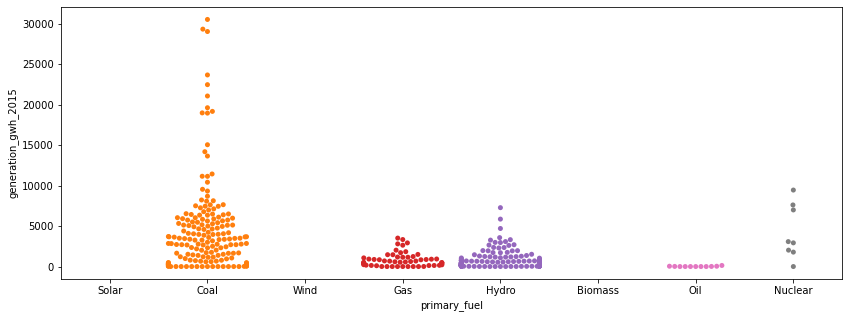

In [56]:
plt.figure(figsize = (14,5))
sns.swarmplot(x='primary_fuel', y='generation_gwh_2015', data=df)


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

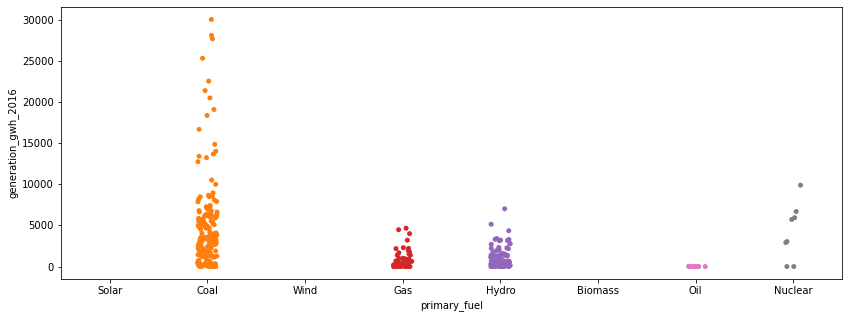

In [57]:
plt.figure(figsize = (14,5))
sns.stripplot(x='primary_fuel', y='generation_gwh_2016', data=df)


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

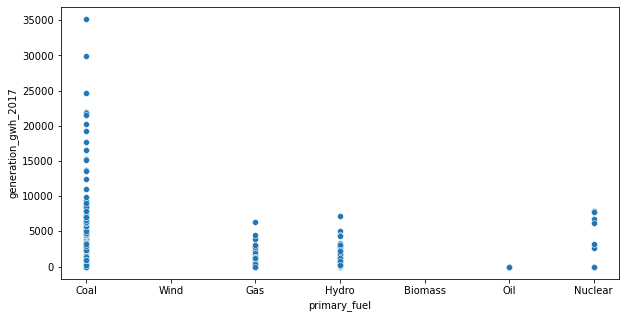

In [58]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2017', data=df)


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

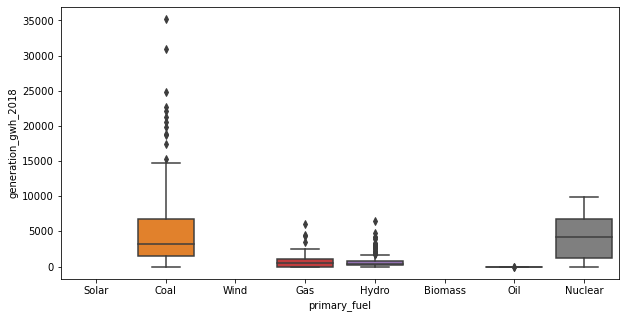

In [59]:
plt.figure(figsize = (10,5))
sns.boxplot(x='primary_fuel', y='generation_gwh_2018', data=df)


From all the plot above in all the years 2015, 2016, 2017, 2018 we can observe that theplants using coal as the primary fuel for power generation is giving the maximum power output compared to others



In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             198 non-null    object 
 5   commissioning_year      527 non-null    float64
 6   owner                   342 non-null    object 
 7   source                  907 non-null    object 
 8   geolocation_source      888 non-null    object 
 9   year_of_capacity_data   519 non-null    float64
 10  generation_gwh_2014     398 non-null    float64
 11  generation_gwh_2015     422 non-null    float64
 12  generation_gwh_2016     434 non-null    float64
 13  generation_gwh_2017     440 non-null    float64
 14  generation_gwh_2018     448 non-null    fl

In [61]:
# Handling the missing values

Obj_columns=df.select_dtypes(include=[object])
Obj_columns


,primary_fuel,other_fuel1,owner,source,geolocation_source,generation_data_source
0,Solar,NaN,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN
1,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN
2,Wind,NaN,AES,CDM,WRI,NaN
3,Gas,NaN,NaN,Central Electricity Authority,WRI,Central Electricity Authority
4,Coal,Oil,NaN,Central Electricity Authority,WRI,Central Electricity Authority
...,...,...,...,...,...,...
902,Coal,Oil,NaN,Central Electricity Authority,WRI,Central Electricity Authority
903,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN
904,Wind,NaN,NaN,CDM,WRI,NaN
905,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN


In [62]:
Obj_columns.drop(['primary_fuel','source'],axis=1,inplace=True)


In [63]:
Obj_columns


,other_fuel1,owner,geolocation_source,generation_data_source
0,NaN,Solar Paces,National Renewable Energy Laboratory,NaN
1,NaN,Ultratech Cement ltd,WRI,NaN
2,NaN,AES,WRI,NaN
3,NaN,NaN,WRI,Central Electricity Authority
4,Oil,NaN,WRI,Central Electricity Authority
...,...,...,...,...
902,Oil,NaN,WRI,Central Electricity Authority
903,NaN,Karnataka Power Corporation Limited,Industry About,NaN
904,NaN,NaN,WRI,NaN
905,NaN,Hindustan Zinc ltd,WRI,NaN


In [64]:
Obj_columns.isnull().sum()


other_fuel1               709
owner                     565
geolocation_source         19
generation_data_source    458
dtype: int64

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
for col in Obj_columns:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1,1))


In [66]:
df.isnull().sum()


capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1                 0
commissioning_year        380
owner                       0
source                      0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source      0
dtype: int64

In [67]:
float_columns=df.select_dtypes(include=[float])
float_columns


,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
float_columns.drop(['capacity_mw'],axis=1,inplace=True)


In [69]:
float_columns.isnull().sum()


latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [70]:
Simputer = SimpleImputer(missing_values=np.nan,strategy='mean')
for col in float_columns:
    df[col]=Simputer.fit_transform(df[col].values.reshape(-1,1))


In [71]:
df.isnull().sum()


capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [72]:
# Encoding the columns that has object dtype
Object_columns=df.select_dtypes(include=[object])
Object_columns.head(1)


,primary_fuel,other_fuel1,owner,source,geolocation_source,generation_data_source
0,Solar,Oil,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Central Electricity Authority


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [74]:
for columns in Object_columns:
    df[columns] = le.fit_transform(df[columns])


In [75]:
df.dtypes


capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
commissioning_year        float64
owner                       int32
source                      int32
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source      int32
dtype: object

In [76]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,98.0,24.7663,74.6090,1,2,1997.091082,258,174,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,39.2,21.9038,69.3732,7,2,1997.091082,2,21,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,135.0,23.8712,91.3602,2,2,2004.000000,5,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,5,22,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,3.0,12.8932,78.1654,6,2,1997.091082,114,77,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,25.5,15.2758,75.5811,7,2,1997.091082,5,21,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,80.0,24.3500,73.7477,1,2,1997.091082,91,59,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


here all the columns are float and integer datatypes

In [77]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,326.223755,21.197918,77.464907,3.206174,1.995590,1997.091082,56.169791,43.847850,1.733186,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
std,590.085456,6.079148,4.812291,2.280652,0.081259,13.016360,82.529116,44.642818,0.677151,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.0
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.725000,17.072000,74.388900,1.000000,2.000000,1997.091082,5.000000,22.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.0
50%,59.200000,21.281800,76.979200,3.000000,2.000000,1997.091082,5.000000,22.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,95.500000,29.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0


Key Observations :

Mean > median (50th percentile) in the columns capacity_mw, owner, source hence the data in these columns are skewed at the left side

We can observe that there is a huge gap between 75th percentile and max in the columns capacity_mw, latitude, longitude, commissioning_year, owner, source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 and hence the data in these columns has outliers

In all the columns except generation_data_source, source, other_fuel1, geolocation_source we can observe that there is a high gap between mean and std, hence the data is highly spreaded


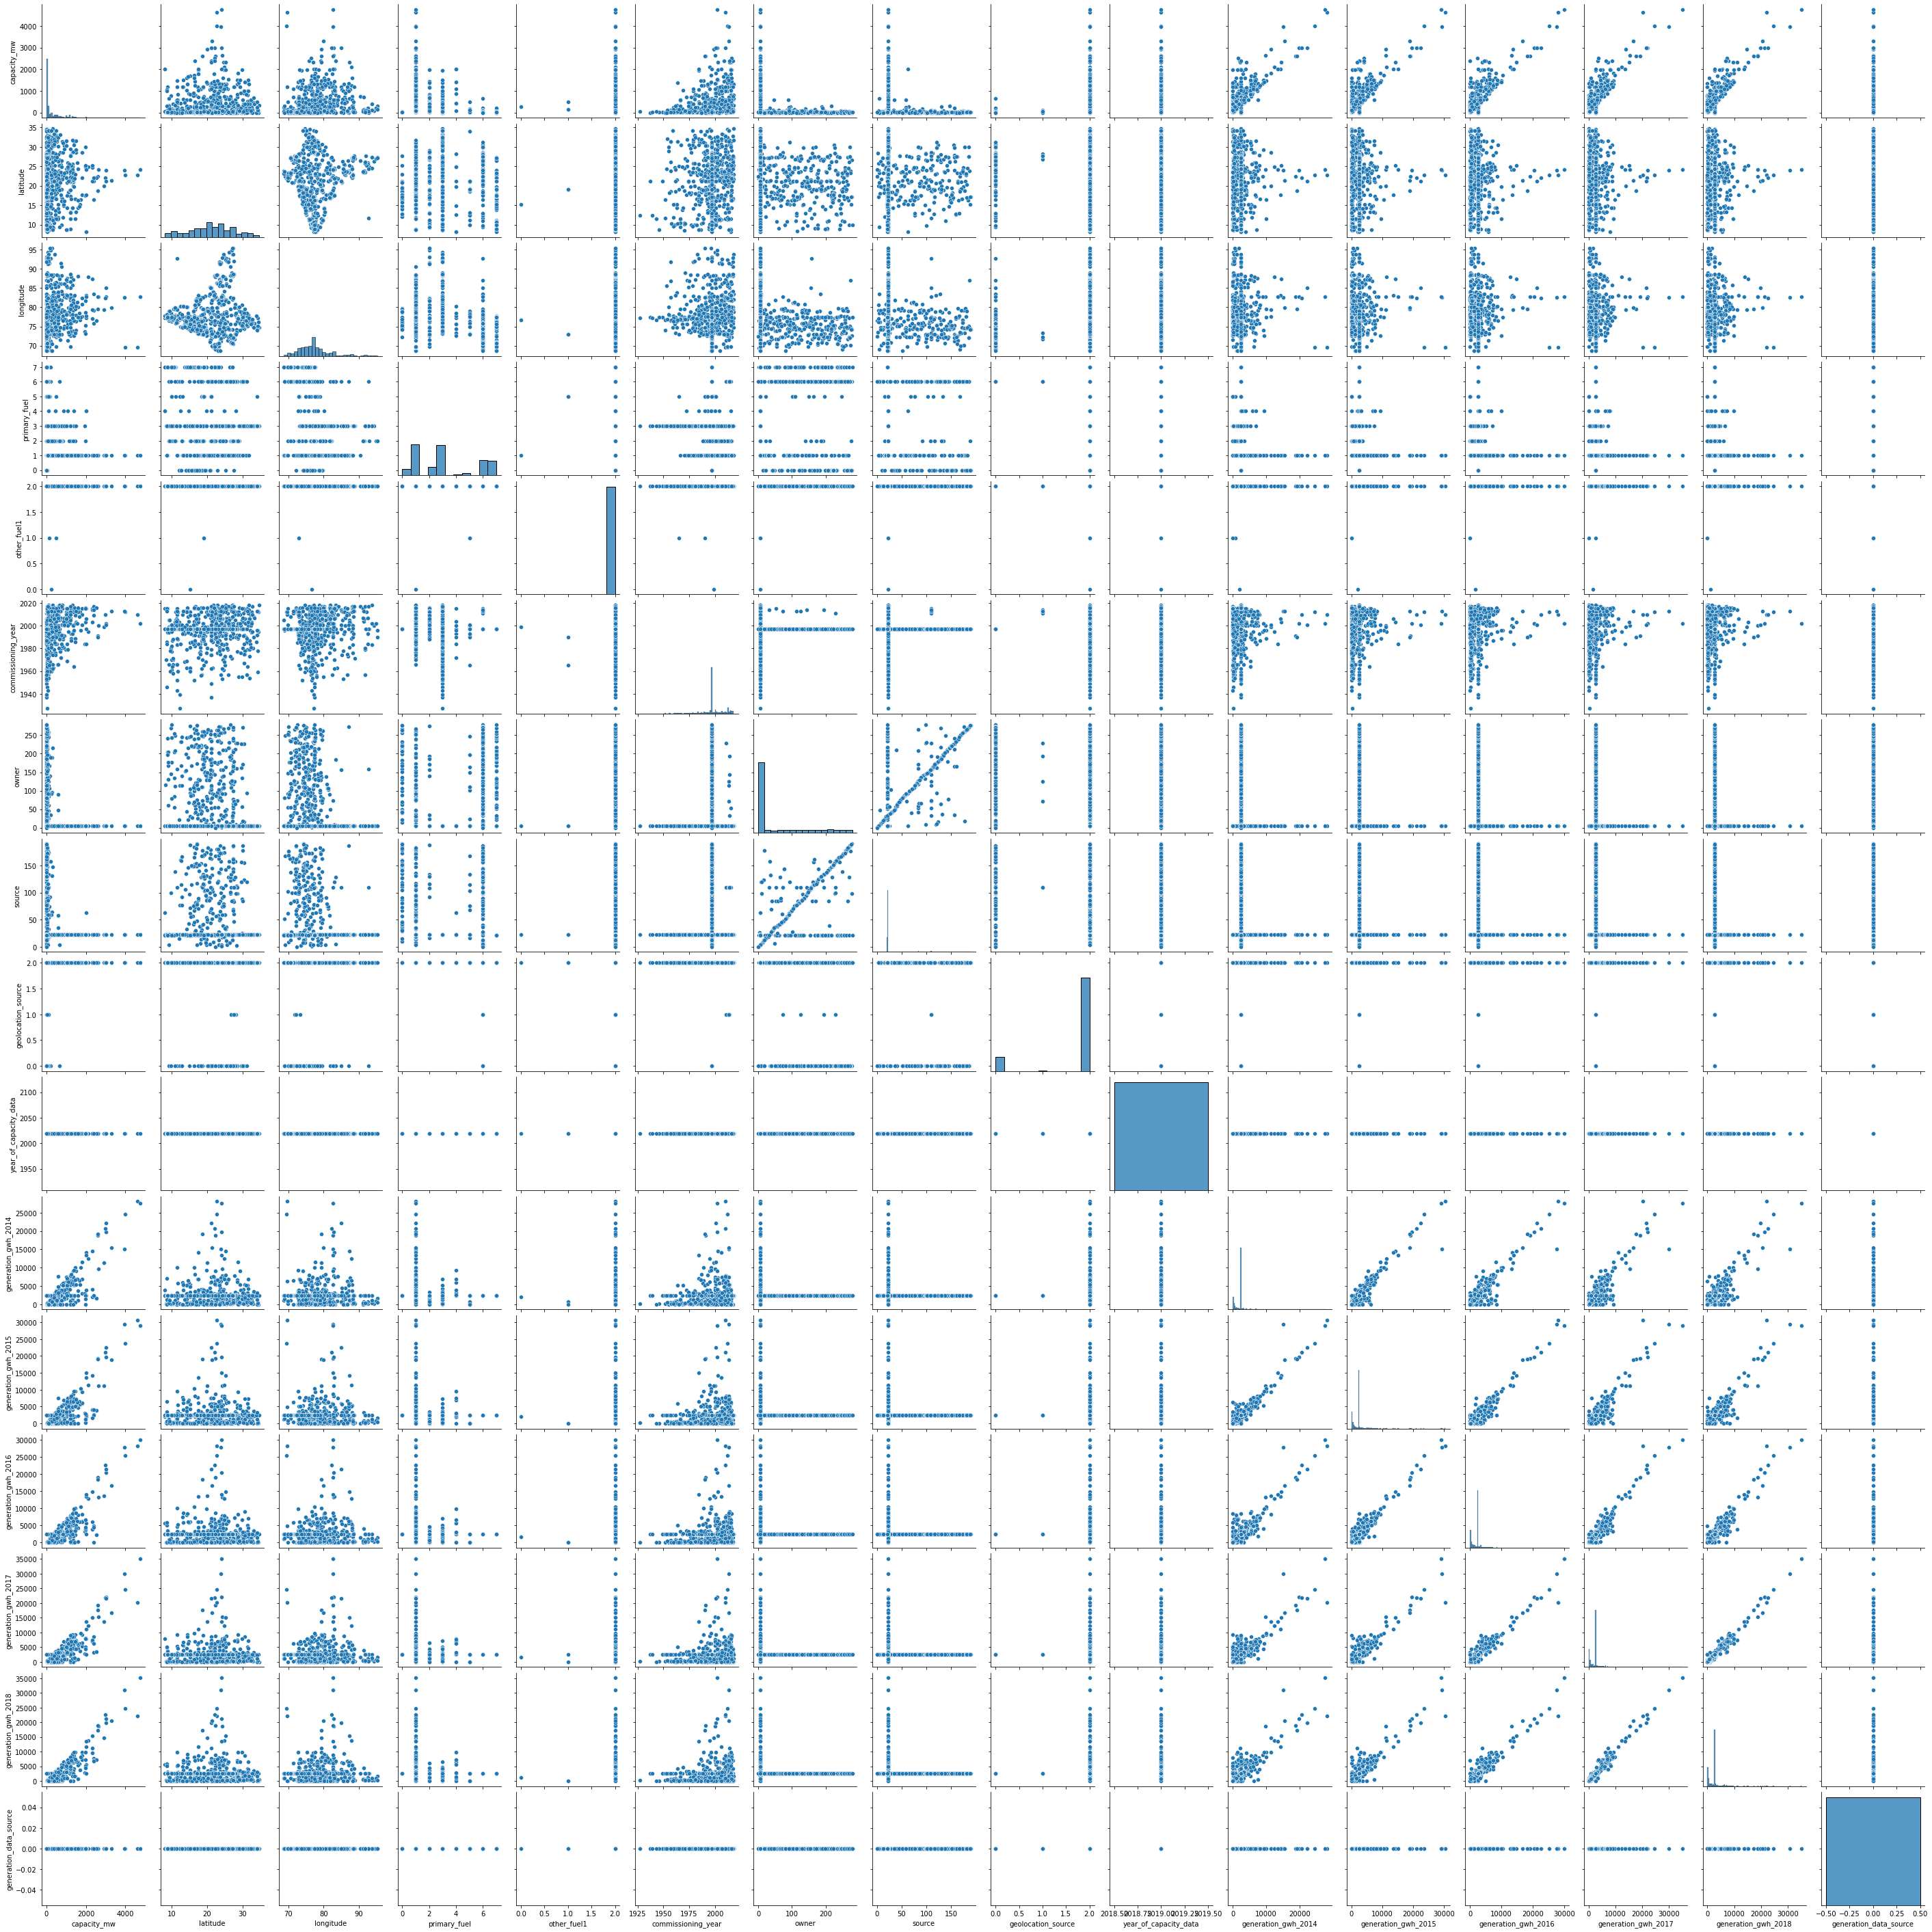

In [78]:
sns.pairplot(df)


In [79]:
df.corr()


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.003105,0.274292,-3.110481e-01,-2.421218e-01,2.048653e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
latitude,0.050984,1.000000,0.036362,-0.010204,0.036695,0.102069,-7.118234e-02,5.592656e-02,-1.842751e-01,NaN,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,NaN
longitude,0.195882,0.036362,1.000000,-0.347948,0.030311,0.092331,-3.012853e-01,-2.393334e-01,2.523426e-01,NaN,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,NaN
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.004912,-0.126650,2.842958e-01,5.361263e-02,-4.832168e-01,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,NaN
other_fuel1,0.003105,0.036695,0.030311,0.004912,1.000000,0.036904,3.368729e-02,2.658990e-02,-2.140831e-02,NaN,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02,NaN
commissioning_year,0.274292,0.102069,0.092331,-0.126650,0.036904,1.000000,1.507424e-02,2.152776e-02,-7.843657e-03,NaN,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01,NaN
owner,-0.311048,-0.071182,-0.301285,0.284296,0.033687,0.015074,1.000000e+00,7.695825e-01,-3.848377e-01,NaN,-6.294944e-17,-4.253175e-17,2.693476e-17,6.221934e-17,4.713271e-17,NaN
source,-0.242122,0.055927,-0.239333,0.053613,0.026590,0.021528,7.695825e-01,1.000000e+00,-5.057202e-01,NaN,-7.136539e-17,-2.160931e-17,-1.636718e-17,-6.157496e-20,1.092118e-17,NaN
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.021408,-0.007844,-3.848377e-01,-5.057202e-01,1.000000e+00,NaN,1.557310e-17,-6.339264e-18,1.115708e-17,-9.450976e-18,-1.048582e-17,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

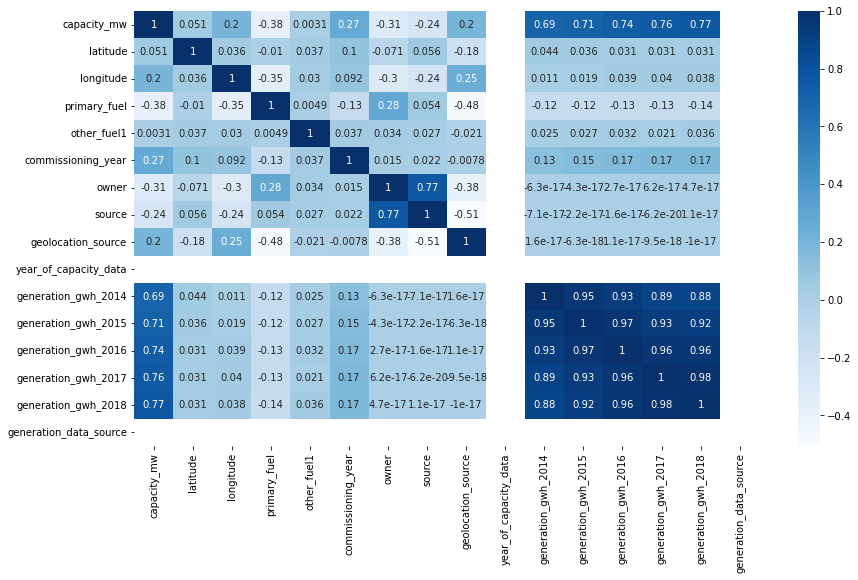

In [80]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)


key observations :

The columns generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are highly correlated to each others

generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are having good correlation with capacity_mw

The columns owner and source are having good correlation
capacity_mw is having negative correlation with primary_fuel, owner and source

primary_fuel has a better correlation only with owner compared to others


capacity_mw                  AxesSubplot(0.125,0.772143;0.227941x0.107857)
latitude                  AxesSubplot(0.398529,0.772143;0.227941x0.107857)
longitude                 AxesSubplot(0.672059,0.772143;0.227941x0.107857)
primary_fuel                 AxesSubplot(0.125,0.642714;0.227941x0.107857)
other_fuel1               AxesSubplot(0.398529,0.642714;0.227941x0.107857)
commissioning_year        AxesSubplot(0.672059,0.642714;0.227941x0.107857)
owner                        AxesSubplot(0.125,0.513286;0.227941x0.107857)
source                    AxesSubplot(0.398529,0.513286;0.227941x0.107857)
geolocation_source        AxesSubplot(0.672059,0.513286;0.227941x0.107857)
year_of_capacity_data        AxesSubplot(0.125,0.383857;0.227941x0.107857)
generation_gwh_2014       AxesSubplot(0.398529,0.383857;0.227941x0.107857)
generation_gwh_2015       AxesSubplot(0.672059,0.383857;0.227941x0.107857)
generation_gwh_2016          AxesSubplot(0.125,0.254429;0.227941x0.107857)
generation_gwh_2017      

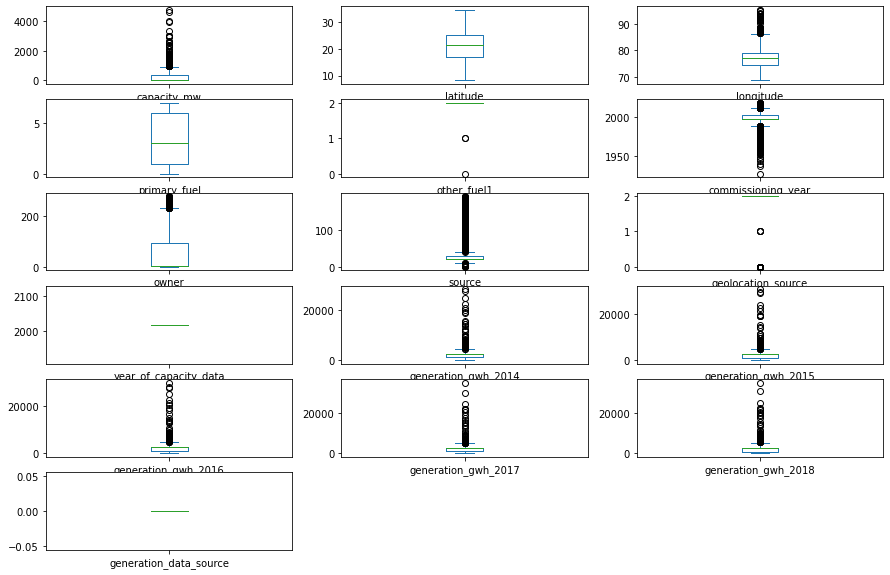

In [81]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,10))


In [82]:
outliers_col=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for col in outliers_col:
    from scipy.stats import zscore
    z=np.abs(zscore(df[col]))


In [83]:
Threshold=3
print(np.where(z>3))


(array([ 15, 143, 209, 308, 364, 493, 494, 648, 657, 695, 721, 724, 726,
       786, 808, 880], dtype=int64),)


In [84]:
df_new=df[(z<3)]
df_new


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,98.0,24.7663,74.6090,1,2,1997.091082,258,174,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,39.2,21.9038,69.3732,7,2,1997.091082,2,21,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,135.0,23.8712,91.3602,2,2,2004.000000,5,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,5,22,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,3.0,12.8932,78.1654,6,2,1997.091082,114,77,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,25.5,15.2758,75.5811,7,2,1997.091082,5,21,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,80.0,24.3500,73.7477,1,2,1997.091082,91,59,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [85]:
df.shape

(907, 16)

In [86]:
df_new.shape

(891, 16)

There are 907 rows and 16 columns in the old dataset

There are 891 rows and 16 columns in new dataset after removing outliers.


In [87]:
# Now we can check for data loss

Dataloss = (((907-891)/907)*100)
Dataloss


1.7640573318632855

We can observe that dataloss in zscore method after removing outliers of 1.7% which is less than 10%



In [88]:
df_new.skew()


capacity_mw                2.216153
latitude                  -0.138749
longitude                  1.199048
primary_fuel               0.444221
other_fuel1              -20.271227
commissioning_year        -1.394961
owner                      1.337427
source                     1.798822
geolocation_source        -2.129725
year_of_capacity_data      0.000000
generation_gwh_2014        1.654353
generation_gwh_2015        1.421369
generation_gwh_2016        1.404266
generation_gwh_2017        1.327407
generation_gwh_2018        1.456303
generation_data_source     0.000000
dtype: float64

In [89]:
# we can observe that there is skewness present in the data in case of capacity_mw, longitude, other_fuel, commissioning_year, owner, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [90]:
df_new[['capacity_mw','longitude','other_fuel1','commissioning_year','owner','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=scaler.fit_transform(df_new[['capacity_mw','longitude','other_fuel1','commissioning_year','owner','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].values)


In [91]:
df_new.skew()


capacity_mw                0.017980
latitude                  -0.138749
longitude                 -0.001414
primary_fuel               0.444221
other_fuel1              -17.175455
commissioning_year        -0.074055
owner                      0.457502
source                    -0.201551
geolocation_source        -2.102802
year_of_capacity_data      0.000000
generation_gwh_2014       -0.229759
generation_gwh_2015       -0.299124
generation_gwh_2016       -0.306715
generation_gwh_2017       -0.323187
generation_gwh_2018       -0.316550
generation_data_source     0.000000
dtype: float64

Here the skewness is removed from the data



Power plant Capacity_mw prediction


We can now check for multicolinearity



In [92]:
# Data to capacity_mw
x=df_new.drop(['capacity_mw'],axis=1)
x.sample()


,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
462,13.6763,-0.409886,3,0.058124,-0.476913,-0.729959,-0.408791,0.400163,2019.0,0.350672,0.374434,0.377301,0.37256,0.38395,0


In [93]:
y=df_new['capacity_mw']
y


0     -1.690798
1      0.227001
2     -0.270575
3      0.399000
4      1.736757
         ...   
902    1.678120
903   -1.610280
904   -0.505423
905    0.117421
906   -0.742325
Name: capacity_mw, Length: 891, dtype: float64

In [94]:
y.shape,x.shape


((891,), (891, 15))

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [96]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)


In [97]:
vif_calc()


    VIF Factor                Features
0     1.100516                latitude
1     1.304445               longitude
2     1.754944            primary_fuel
3     1.043418             other_fuel1
4     1.098223      commissioning_year
5     2.678066                   owner
6     2.460340                  source
7     1.745866      geolocation_source
8    18.471390   year_of_capacity_data
9     4.331731     generation_gwh_2014
10    8.070845     generation_gwh_2015
11   11.048047     generation_gwh_2016
12   11.980163     generation_gwh_2017
13   11.683688     generation_gwh_2018
14         NaN  generation_data_source


here we can see that year_of_capacity_data is creating multicolinearity with the columns generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, hence either of these columns can be dropped, we can decide which column has to be dropped by observing heatmap of correlation

from the heat map we can see that year_of_capacity_data has the least correlation with all the columns and hence its good to drop the same column


In [98]:
x = x.drop(["year_of_capacity_data"],axis=1)
x.shape


(891, 14)

In [99]:
vif_calc()

    VIF Factor                Features
0     3.511452                latitude
1     1.271330               longitude
2     4.062742            primary_fuel
3     1.042940             other_fuel1
4     1.098055      commissioning_year
5     2.677654                   owner
6     2.430447                  source
7     1.487241      geolocation_source
8     4.329005     generation_gwh_2014
9     8.064246     generation_gwh_2015
10   11.030069     generation_gwh_2016
11   11.976251     generation_gwh_2017
12   11.680848     generation_gwh_2018
13         NaN  generation_data_source


We can still observe that generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 are creating multicolinearity and from the heat map we can see that generation_gwh_2016 is giving less contribution to output variable hence the column generation_gwh_2016 can be dropped



In [100]:
x = x.drop(["generation_gwh_2016"],axis=1)
x.shape


(891, 13)

In [101]:
vif_calc()


    VIF Factor                Features
0     3.511159                latitude
1     1.264001               longitude
2     4.062668            primary_fuel
3     1.040719             other_fuel1
4     1.087985      commissioning_year
5     2.675654                   owner
6     2.430103                  source
7     1.486811      geolocation_source
8     4.328769     generation_gwh_2014
9     5.473035     generation_gwh_2015
10   10.888017     generation_gwh_2017
11   11.255356     generation_gwh_2018
12         NaN  generation_data_source


Here the multicolinearity is removed from the data



In [102]:
# Splitting the data for training and testing the model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)


In [103]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((668, 13), (223, 13), (668,), (223,))

In [104]:
from sklearn.linear_model import Ridge, Lasso
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()
La=Lasso()
rd=Ridge()


In [105]:
model=[lm,DTR,KNR,svr,La,rd]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Score of ",m,"is :",m.score(x_train,y_train))
    print("r2 score :",r2_score(y_test,pred))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Mean squared error :",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')



Score of  LinearRegression() is : 0.526964998486197
r2 score : 0.5431221342170995
Errors of  LinearRegression() is
Mean absolute error : 0.5452001250315007
Mean squared error : 0.48679397835612814
Root mean squared error : 0.6977062263991402


Score of  DecisionTreeRegressor() is : 0.9985186614067719
r2 score : 0.6632578598304386
Errors of  DecisionTreeRegressor() is
Mean absolute error : 0.40903108593018106
Mean squared error : 0.3587918311875306
Root mean squared error : 0.5989923465183262


Score of  KNeighborsRegressor() is : 0.7431599699297895
r2 score : 0.6599754162584499
Errors of  KNeighborsRegressor() is
Mean absolute error : 0.4171614913411054
Mean squared error : 0.3622892073679237
Root mean squared error : 0.6019046497311046


Score of  SVR() is : 0.5214495608943682
r2 score : 0.5462384530503099
Errors of  SVR() is
Mean absolute error : 0.5279788417152839
Mean squared error : 0.48347360467147804
Root mean squared error : 0.6953226622737663


Score of  Lasso() is : 0.0761964

From the above scores and r2 scoes we can see that DecisionTreeRegressor() model is working best with the score and r2 score of 99.8% and 69%



In [106]:
#WE can now try with Cross validation for the models 
from sklearn.model_selection import cross_val_score
model=[lm,DTR,KNR,svr,La,rd]
for i in model:
    score=cross_val_score(i,x_train,y_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())
    print('\n')


score of  LinearRegression() is : [0.38990622 0.59382726 0.49808854 0.45181738 0.57028635]
score mean of  LinearRegression() is : 0.5007851472318062
score std of  LinearRegression() is : 0.07508195838364123


score of  DecisionTreeRegressor() is : [0.65796502 0.5218691  0.62677609 0.66769582 0.70304129]
score mean of  DecisionTreeRegressor() is : 0.6354694661349584
score std of  DecisionTreeRegressor() is : 0.06179183822944826


score of  KNeighborsRegressor() is : [0.60289942 0.60297797 0.64581789 0.55780569 0.67201934]
score mean of  KNeighborsRegressor() is : 0.616304061194843
score std of  KNeighborsRegressor() is : 0.039381687309702866


score of  SVR() is : [0.37238874 0.56161741 0.50339502 0.46351638 0.52959179]
score mean of  SVR() is : 0.48610186805167166
score std of  SVR() is : 0.06532044492038837


score of  Lasso() is : [0.06600016 0.05381022 0.08850712 0.07147926 0.06541567]
score mean of  Lasso() is : 0.06904248829064227
score std of  Lasso() is : 0.011306998556040115




Even with CV we can see that DecisionTreeRegressor() model is performing well with mean score of 63.5%



In [107]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV
DTR=DecisionTreeRegressor()
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}
grd=GridSearchCV(estimator=DTR,param_grid=params,cv=5)
grd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [108]:
grd.best_params_


{'criterion': 'absolute_error'}

In [109]:
grd.best_score_


0.6828928907984021

In [110]:
# Saving the best model
Final_regressor=DecisionTreeRegressor(criterion='absolute_error')
Final_regressor.fit(x_train,y_train)
pred=Final_regressor.predict(x_test)
print("Score: ",Final_regressor.score(x_train,y_train)*100)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test,pred)))



Score:  99.84653500750623
R2_Score: 71.75846003057838
mean_squared_error: 0.30090780548233115
mean_absolute_error: 0.37709121122773404
RMSE value: 0.5485506407637595


In [111]:
# We can save the model now
import joblib
joblib.dump(Final_regressor,'Power_plant_capacity_prediction.obj')


['Power_plant_capacity_prediction.obj']

Loading the saved model and predicting the values



In [112]:
power_plant_capacity=joblib.load('Power_plant_capacity_prediction.obj')


In [113]:
pred=power_plant_capacity.predict(x_test)
print("Predicted values :",pred)


Predicted values : [-1.47647209  0.70464006  0.18910816  0.72615148 -0.74232535  0.39900036
 -0.33090749 -0.74232535 -1.02720299  0.08248348 -0.43519237  0.26415163
  0.30647444 -2.03192073  0.27870726  1.04458354  0.39900036 -1.3678335
  0.23788514 -1.3678335   1.58943853  0.30647444 -0.36460807  1.7367566
 -0.57370121 -0.57370121 -0.589928    1.26425157  0.33589665 -0.63785506
 -0.03860694  1.08769814 -0.79389158 -0.33246591 -0.74232535 -0.53850542
 -0.36460807 -0.79389158  0.08248348 -2.03192073 -2.03192073  1.58189625
  0.82193489  0.02616634 -1.1284381  -0.41667425  0.23788514 -0.53850542
  0.17382584 -1.3678335  -0.00780037 -0.31254626  1.44202864  0.90466855
 -1.01107447 -0.03860694 -0.56648013  0.24854929  0.45530006  1.08769814
 -1.41960316 -0.03860694  0.23788514  0.10128569  0.23788514  1.27501159
  0.69128677  0.52821483  0.76664179 -0.13783616 -0.91393119  1.53401287
  0.48971527  1.53401287 -0.79389158 -0.33090749 -0.36460807 -1.1284381
 -0.49482346 -0.64332358 -0.5054231

In [114]:
y_test


719   -0.354765
444    0.311884
855    0.264152
733    0.399000
40    -0.454358
         ...   
896   -1.526363
430   -0.913931
102    0.634110
201   -0.793892
429    0.704640
Name: capacity_mw, Length: 223, dtype: float64

In [116]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred.round(2),'Original values':y_test.round(2)})
df1


,Predicted values,Original values
719,-1.48,-0.35
444,0.70,0.31
855,0.19,0.26
733,0.73,0.40
40,-0.74,-0.45
...,...,...
896,-0.54,-1.53
430,-1.48,-0.91
102,0.63,0.63
201,-1.57,-0.79


We can observe that both predicted and original values to be almost near by



Power plant primary fuel prediction


In [118]:
xp=df_new.drop(['primary_fuel'],axis=1)
xp.shape


(891, 15)

In [119]:
yp=df_new['primary_fuel']
yp.shape


(891,)

In [120]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(xp.values,i)for i in range(xp.shape[1])]
    vif["Features"]=xp.columns
    print(vif)


In [121]:
vif_calc()


    VIF Factor                Features
0     1.975439             capacity_mw
1     1.101218                latitude
2     1.227013               longitude
3     1.047385             other_fuel1
4     1.209143      commissioning_year
5     3.004119                   owner
6     2.141710                  source
7     1.564081      geolocation_source
8    14.178889   year_of_capacity_data
9     4.341782     generation_gwh_2014
10    8.068856     generation_gwh_2015
11   11.051169     generation_gwh_2016
12   11.995555     generation_gwh_2017
13   11.686420     generation_gwh_2018
14         NaN  generation_data_source


dropping year_of_capacity_data



In [122]:
xp = xp.drop(["year_of_capacity_data"],axis=1)
xp.shape


(891, 14)

In [123]:
vif_calc()


    VIF Factor                Features
0     1.968826             capacity_mw
1     1.007139                latitude
2     1.224324               longitude
3     1.046447             other_fuel1
4     1.203320      commissioning_year
5     2.943661                   owner
6     2.125435                  source
7     1.492678      geolocation_source
8     4.336905     generation_gwh_2014
9     8.064781     generation_gwh_2015
10   11.034687     generation_gwh_2016
11   11.987865     generation_gwh_2017
12   11.686216     generation_gwh_2018
13         NaN  generation_data_source


In [124]:
xp = xp.drop(["generation_gwh_2018"],axis=1)
xp.shape


(891, 13)

In [125]:
vif_calc()


    VIF Factor                Features
0     1.966853             capacity_mw
1     1.007137                latitude
2     1.224286               longitude
3     1.024204             other_fuel1
4     1.202549      commissioning_year
5     2.937970                   owner
6     2.124959                  source
7     1.492227      geolocation_source
8     4.313226     generation_gwh_2014
9     8.064416     generation_gwh_2015
10   10.629875     generation_gwh_2016
11    5.490207     generation_gwh_2017
12         NaN  generation_data_source


In [126]:
xp_train,xp_test,yp_train,yp_test=train_test_split(xp,yp,test_size=.25,random_state=42)


In [127]:
xp_train.shape,xp_test.shape,yp_train.shape,yp_test.shape


((668, 13), (223, 13), (668,), (223,))

In [128]:
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()
La=Lasso()
rd=Ridge()


In [129]:
model=[lm,DTR,KNR,svr,La,rd]
for m in model:
    m.fit(xp_train,yp_train)
    m.score(xp_train,yp_train)
    pred=m.predict(xp_test)
    print("Score of ",m,"is :",m.score(xp_train,yp_train))
    print("r2 score :",r2_score(yp_test,pred))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(yp_test,pred))
    print("Mean squared error :",mean_squared_error(yp_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(yp_test,pred)))
    print('\n')


Score of  LinearRegression() is : 0.4826575232546958
r2 score : 0.4419348346721055
Errors of  LinearRegression() is
Mean absolute error : 1.2602647691093813
Mean squared error : 2.8446072560808653
Root mean squared error : 1.6865963524450256


Score of  DecisionTreeRegressor() is : 1.0
r2 score : 0.8671582203075563
Errors of  DecisionTreeRegressor() is
Mean absolute error : 0.3004484304932735
Mean squared error : 0.6771300448430493
Root mean squared error : 0.8228791192168199


Score of  KNeighborsRegressor() is : 0.8184758959519736
r2 score : 0.7075369454241327
Errors of  KNeighborsRegressor() is
Mean absolute error : 0.7147982062780268
Mean squared error : 1.4907623318385652
Root mean squared error : 1.220967784930694


Score of  SVR() is : 0.3873109265240743
r2 score : 0.34940673518477816
Errors of  SVR() is
Mean absolute error : 1.2746402346079218
Mean squared error : 3.316247701580407
Root mean squared error : 1.8210567540800058


Score of  Lasso() is : 0.09358034031147011
r2 scor

From the above scores and r2 scoes we can see that DecisionTreeRegressor() model is working best with the score and r2 score of 100% and 88%



In [130]:
#WE can now try with Cross validation for the models 
from sklearn.model_selection import cross_val_score
model=[lm,DTR,KNR,svr,La,rd]
for i in model:
    score=cross_val_score(i,xp_train,yp_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())
    print('\n')


score of  LinearRegression() is : [0.3732029  0.5923643  0.39351389 0.35907563 0.57933155]
score mean of  LinearRegression() is : 0.4594976553102228
score std of  LinearRegression() is : 0.10382575129671281


score of  DecisionTreeRegressor() is : [0.78038678 0.87919909 0.85936397 0.82442536 0.72937294]
score mean of  DecisionTreeRegressor() is : 0.8145496284762661
score std of  DecisionTreeRegressor() is : 0.054235739145145644


score of  KNeighborsRegressor() is : [0.55241495 0.80277662 0.70085596 0.64401136 0.62250825]
score mean of  KNeighborsRegressor() is : 0.6645134287593566
score std of  KNeighborsRegressor() is : 0.08389079565426281


score of  SVR() is : [0.28502585 0.43797153 0.2596556  0.35981904 0.50061794]
score mean of  SVR() is : 0.3686179907082116
score std of  SVR() is : 0.09074334285402032


score of  Lasso() is : [0.06841829 0.08107178 0.06815456 0.09040933 0.07305055]
score mean of  Lasso() is : 0.0762209011117371
score std of  Lasso() is : 0.008495178842398381


s

Even with CV we can see that DecisionTreeRegressor() model is performing well with mean score of 81%



In [131]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV
DTR=DecisionTreeRegressor()
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}
grd=GridSearchCV(estimator=DTR,param_grid=params,cv=5)
grd.fit(xp_train,yp_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [132]:
grd.best_params_


{'criterion': 'squared_error'}

In [133]:
grd.best_score_


0.8004169576908247

In [134]:
# Saving the best model
Final_model=DecisionTreeRegressor(criterion='poisson')
Final_model.fit(xp_train,yp_train)
pred=Final_model.predict(xp_test)
print("Score: ",Final_model.score(xp_train,yp_train)*100)
print('R2_Score:',r2_score(yp_test,pred)*100)
print('mean_squared_error:',mean_squared_error(yp_test,pred))
print('mean_absolute_error:',mean_absolute_error(yp_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(yp_test,pred)))


Score:  99.84363385756396
R2_Score: 75.52208364475044
mean_squared_error: 1.2477047987213437
mean_absolute_error: 0.40319726545326656
RMSE value: 1.1170070719209184


In [135]:
# We can save the model now
import joblib
joblib.dump(Final_model,'Power_plant_primary_fuel_prediction.obj')


['Power_plant_primary_fuel_prediction.obj']

Loading the saved model and predicting the values



In [136]:
Primary_fuel_prediction=joblib.load('Power_plant_primary_fuel_prediction.obj')


In [137]:
pred=Primary_fuel_prediction.predict(xp_test)
print("Predicted values :",pred)


Predicted values : [7.         3.         3.         3.         0.05882353 1.
 7.         0.25       7.         1.         7.         3.
 7.         6.         3.         1.         5.         6.
 2.         6.         2.         7.         7.         1.
 7.         7.         7.         1.         5.         6.
 3.         1.         3.         1.         7.         1.
 1.         6.         2.         6.         6.         1.
 1.         2.         3.         3.         7.         0.0625
 7.         6.         1.         6.         1.         5.
 6.         3.         0.0625     7.         1.         1.
 7.         3.         3.         3.         6.         3.
 0.25       3.         0.5        3.         3.         1.
 3.         2.         3.         7.         7.         3.
 0.25       0.05882353 7.         7.         3.         3.
 2.         7.         1.         3.         7.         1.
 1.         3.         3.         6.         1.         6.
 3.         3.         0.05882353

In [138]:
yp_test


719    7
444    3
855    3
733    1
40     0
      ..
896    7
430    3
102    1
201    3
429    3
Name: primary_fuel, Length: 223, dtype: int32

In [139]:
# Making a DataFrame of Predicted values and Original values
df11=pd.DataFrame({'Predicted values':pred.round(2),'Original values':yp_test})
df11


,Predicted values,Original values
719,7.00,7
444,3.00,3
855,3.00,3
733,3.00,1
40,0.06,0
...,...,...
896,7.00,7
430,3.00,3
102,3.00,1
201,3.00,3


We can observe that both predicted and original values to be almost near by

completed the task 